
# 📘 Clasificación Binaria con Regresión Logística  
### Ejemplo: ¿El gato atrapa al ratón? 🐱🐭  

En este cuaderno exploraremos un modelo de **regresión logística** explicamos paso a paso cómo construimos, entrenamos y evaluamos un modelo de clasificación binaria utilizando regresión logística en PyTorch.

El objetivo es simular un escenario divertido:  
- 🐱 Un gato intenta atrapar a un ratón.

- Queremos predecir la probabilidad de éxito dependiendo de dos factores:
    - velocidad del gato (0 a 20 m/s)
    - energía del gato (0 a 1, normalizada)




## 1. Preparación del entorno

In [5]:

import torch
from torch import nn

import os
import math

import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc

print("Librerías cargadas correctamente ✅")


Librerías cargadas correctamente ✅


Aquí usamos:

- PyTorch para el modelo.
- learn para métricas y evaluaciones.
- matplotlib para graficar resultados

## 2. Definición del modelo de Regresión Logística

In [6]:

class LogisticRegressor(nn.Module):
    def __init__(self):
        super().__init__()
        # Dos entradas (velocidad, energía) → una salida (probabilidad)
        self.linear = nn.Linear(2, 1)

    def forward(self, x):
        # Aplicamos sigmoide para obtener probabilidad entre [0,1]
        return torch.sigmoid(self.linear(x))

📌 Matemáticamente:

𝑦= 𝜎 (𝑊1 ⋅ velocidad + 𝑊2 ⋅ energía + b)

donde σ es la función sigmoide.

## 3. Generación de los datos simulados

In [7]:
# Simulamos 500 ejemplos
velocidad = torch.rand(500, 1) * 10      # entre 0 y 10 m/s
energia = torch.rand(500, 1)             # entre 0 y 1
base = velocidad * energia

# Etiquetas: 1 = atrapa, 0 = no atrapa
y = ((base + 0.5 * torch.randn(500, 1)) > 3).float()

# Concatenamos entradas
x = torch.cat([velocidad, energia], dim=1)



Cuanto más rápido y con más energía esté el gato, más probable es que atrape al ratón.

Agregamos un poco de ruido aleatorio para que no sea tan perfecto

## 4. Entrenamiento del modelo

In [8]:

model = LogisticRegressor()
optim = torch.optim.SGD(model.parameters(), lr=0.1)
loss_fn = nn.BCELoss()


losses = []
for _ in range(500):
    pred = model(x)
    loss = loss_fn(pred, y)
    optim.zero_grad()
    loss.backward()
    optim.step()
    losses.append(loss.item())


Usamos descenso de gradiente estocástico (SGD) con tasa de aprendizaje 0.1.

La función de pérdida es Binary Cross Entropy (BCE), típica en clasificación binaria.

Entrenamos durante 500 iteraciones.

## 5. Curva de pérdida

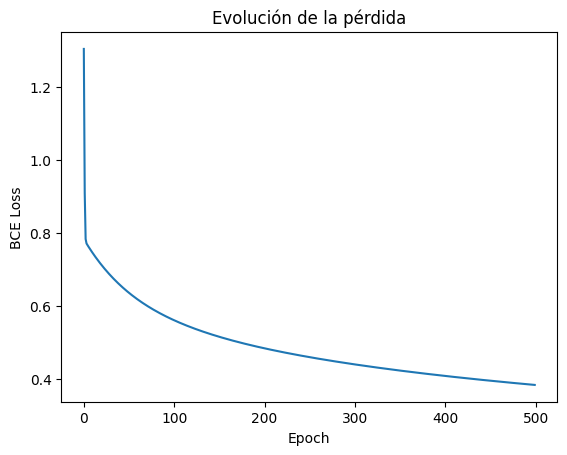

In [9]:

plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("BCE Loss")
plt.title("Evolución de la pérdida")
plt.show()


👉 Esperamos ver cómo la pérdida disminuye con el tiempo, lo cual indica que el modelo está aprendiendo.

## 6. Evaluacion del modelo

In [10]:

with torch.no_grad():
    y_pred_prob = model(x).numpy()
    y_pred_class = (y_pred_prob >= 0.5).astype(int)

acc = accuracy_score(y.numpy(), y_pred_class)
prec = precision_score(y.numpy(), y_pred_class)
rec = recall_score(y.numpy(), y_pred_class)
f1 = f1_score(y.numpy(), y_pred_class)

print(f"Accuracy: {acc:.2f}")
print(f"Precisión: {prec:.2f}")
print(f"Sensibilidad (Recall): {rec:.2f}")
print(f"F1-Score: {f1:.2f}")



Accuracy: 0.84
Precisión: 0.76
Sensibilidad (Recall): 0.72
F1-Score: 0.74


- Accuracy: % de aciertos totales.
- Precisión: de los que predije como "1", cuántos realmente lo eran.
- Recall: de los que eran "1", cuántos detecté.
- F1-score: balance entre precisión y recall.

## 7. Matriz de confusión

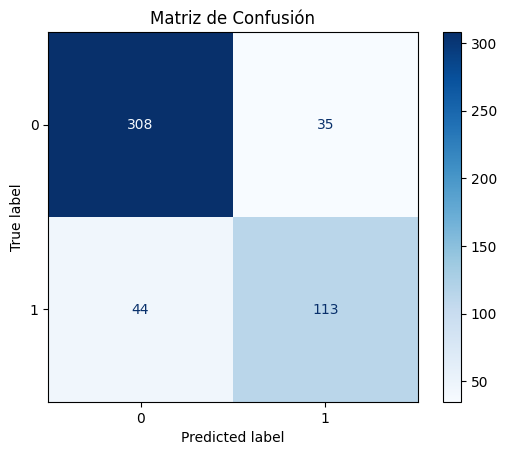

In [11]:
cm = confusion_matrix(y.numpy(), y_pred_class)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusión")
plt.show()


Nos permite ver errores tipo:
-  Falsos positivos (predijo atrapa, pero no atrapó).
- Falsos negativos (predijo no atrapa, pero sí atrapó).

## 8. Curva ROC y AUC

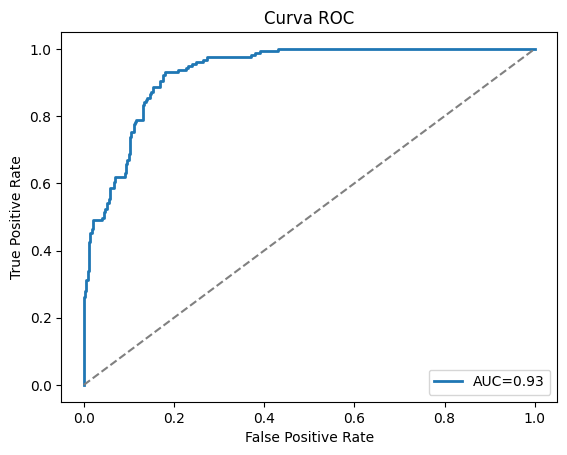

In [12]:
fpr, tpr, _ = roc_curve(y.numpy(), y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, lw=2, label=f"AUC={roc_auc:.2f}")
plt.plot([0,1],[0,1],'--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC")
plt.legend(loc="lower right")
plt.show()


La curva ROC muestra el trade-off entre sensibilidad y especificidad.
- Un AUC cercano a 1.0 indica excelente desempeño.

## 9. Predicción de ejemplo

In [13]:
entrada = torch.tensor([[14.5, 0.9]])  # velocidad=14.5, energía=0.9
with torch.no_grad():
    prob = model(entrada).item()
    clase = 1 if prob >= 0.5 else 0

print(f"Probabilidad: {prob:.2f} → Clase: {clase}")


Probabilidad: 0.96 → Clase: 1


Ejemplo:
- Si el gato corre 14.5 m/s y está con energía 0.9, hay gran probabilidad de que atrape al ratón.


## 10. Conclusiones  

- La **regresión logística** permite clasificar en dos clases (0 o 1) a partir de probabilidades.  
- Vimos cómo el **gato atrapa al ratón** depende de su velocidad y energía.  
- El modelo logra métricas razonables en un dataset simulado.  
